#### Lotka Volterra (predator & prey) / Kolmogorov equations iteration

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [52]:
def Lotka_Volterra(z,t,alpha,beta,gamma,delta):
    x,y = z
    dx_dt = alpha*x - beta*x*y # instaneous growth of prey
    dy_dt = -gamma*y + delta*x*y # instaneous growth of predator
 
    return([dx_dt,dy_dt])

In [53]:
x0 = 0.9 # population density of prey
y0 = 0.1 # "  ditto " " of predator
 
alpha = 0.4  # max prey per capita growth rate
delta =  0.2 # effect of prescence of prey on predator's growth rate
beta = 0.35 # effect of prescence of predator on prey's death rate
gamma = 0.1 # predator's death rate


In [54]:
t = np.linspace(0,100,10000)

solution = scipy.integrate.odeint(Lotka_Volterra,[x0,y0],t,args=(alpha,beta,delta, gamma))
solution = np.array(solution)

<function matplotlib.pyplot.show(close=None, block=None)>

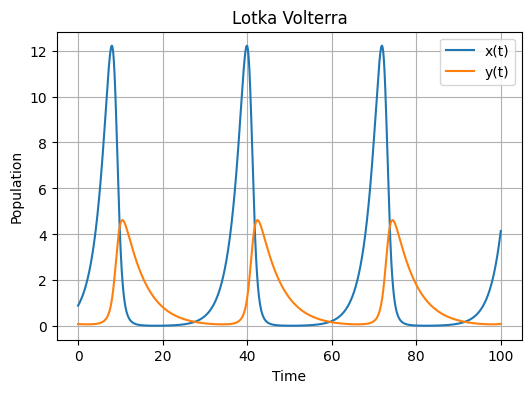

In [55]:
plt.figure(figsize=[6,4])
plt.plot(t,solution[:,0],label="x(t)")
plt.plot(t,solution[:,1],label="y(t)")

plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Lotka Volterra")
plt.show #x

# Solution to the equation

The eqn have periodic sol.  If none of the 4 parameters above vanish it can be absorbed into normalization of variabels & reduce to only 1 parameter,namely dy_dx. ( 1st B/a & delta/gamma are absorb by normalization of y & x respectively)

In [20]:
def Space_Phase(z,t,alpha,beta,gamma,delta):
    dy_dx = -y/x * (delta*x -gamma)/(beta*y -alpha)

    return dy_dx

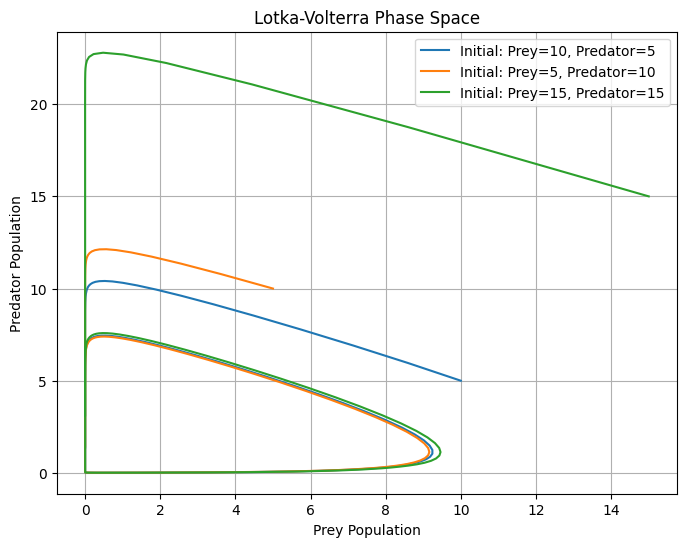

In [46]:


# Time span
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Initial conditions
initial_conditions = [
    [10, 5],  # Example 1: Starting population
    [5, 10],  # Example 2: Different initial populations
    [15, 15]  # Example 3: Larger initial populations
]

# Plot phase space
plt.figure(figsize=(8, 6))
for z0 in initial_conditions:
    solution = solve_ivp(
        lotka_volterra, t_span, z0, t_eval=t_eval,
        args=(alpha, beta, delta, gamma), dense_output=True
    )
    x, y = solution.y
    plt.plot(x, y, label=f"Initial: Prey={z0[0]}, Predator={z0[1]}")

# Add labels and legend
plt.title("Lotka-Volterra Phase Space")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.grid()
plt.legend()
plt.show()
